In [ ]:
# ..... visualizing clustering stability with clustree .... #

In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(clustree)

In [3]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [4]:
# load data
id = 8
sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))
sc1

An object of class Seurat 
17007 features across 8301 samples within 1 assay 
Active assay: RNA (17007 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [5]:
ress = c(0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 1.2)
sc1 <- FindNeighbors(sc1, dims = 1:10)
sc1 <- FindClusters(sc1, resolution = ress, verbose = F)

Computing nearest neighbor graph

Computing SNN



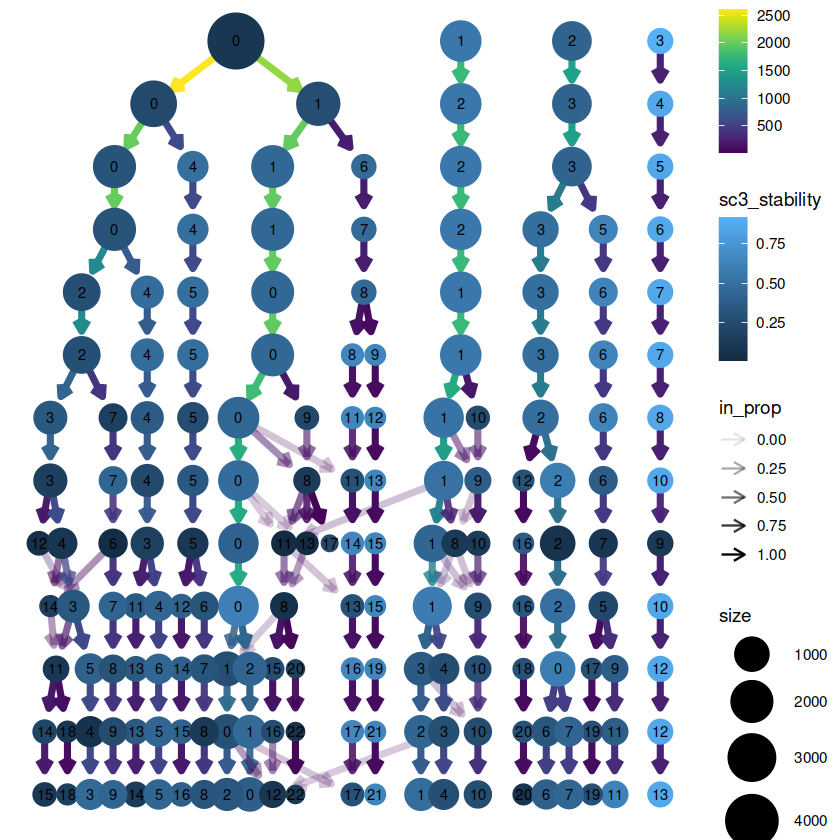

In [7]:
# clustree(sc1, prefix = "RNA_snn_res.")
# clustree(sc1, prefix = "RNA_snn_res.", layout = "sugiyama")
clustree(sc1, prefix = "RNA_snn_res.", node_colour = "sc3_stability")

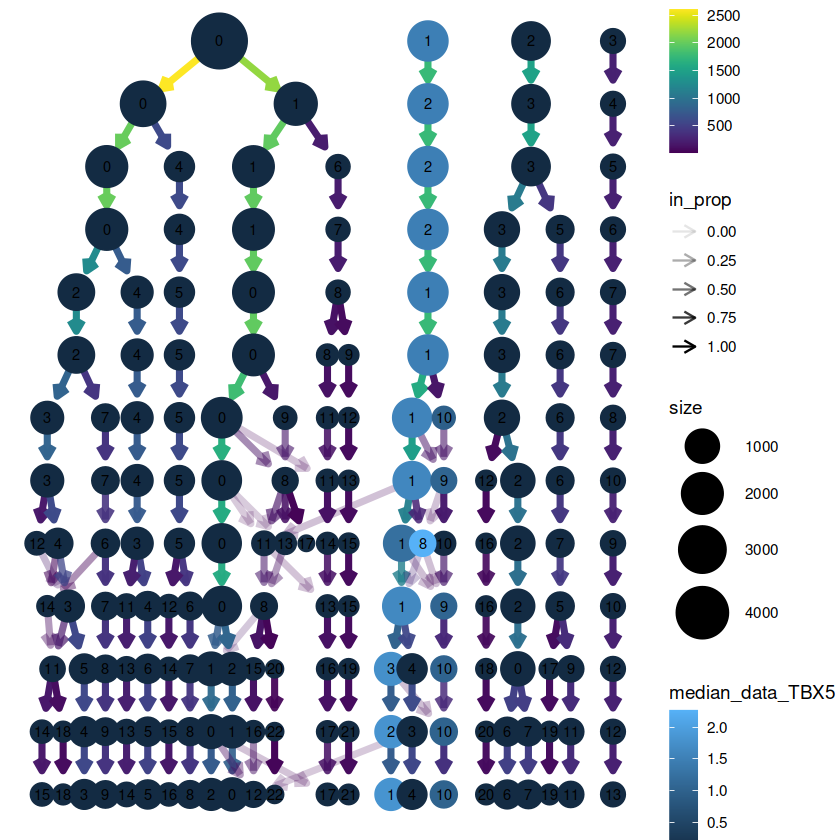

In [8]:
clustree(sc1, prefix = "RNA_snn_res.", node_colour = "TBX5", node_colour_aggr = "median")

In [ ]:
# ..... using Grabski et al method for significant hierarchical clustering ..... #

In [10]:
library(scSHC)
pb = txtProgressBar(min = 0, max = length(stages), initial = 0)

for(id in 1:length(stages)){
    
    # load data
    sc1 = readRDS(paste0(stages[id], '_', samples[id], '_data.rds'))
    sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id]))

    mat1 = GetAssayData(sc1, 'counts')

    start.time <- Sys.time()

    clusters <- scSHC(mat1, alpha = 0.25, parallel = FALSE)

    end.time <- Sys.time()
    time.taken <- round(end.time - start.time,2)
    print(time.taken)

    # save
    save(clusters, file = paste0(stages[id], '_', samples[id], '_clusters_SHC.Rdata'))
    setTxtProgressBar(pb, id)
}

Time difference of 11.88 mins
==========Time difference of 16.52 mins
==========Time difference of 19.86 mins
==========Time difference of 17.26 mins
==========Time difference of 18.93 mins
==========Time difference of 12 mins
==========Time difference of 11 mins
==========Time difference of 21.35 mins